<a href="https://colab.research.google.com/github/shravs45/Machine-Learning/blob/Binary-Classification-Problem/Disputed_OR_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

In [4]:
def load_data(filepath):
  df = pd.read_csv(filepath)  
  return df

In [5]:
def week_number_of_the_month(strdt):
  # splitting input text using separator '-'
  year,month,day=strdt.split('-')
  # get date for given strdt from datetime module 
  dt=datetime.datetime(int(year),int(month),int(day)).date()
  # get week number for the given date with respect to month
  weeknumber=(dt.isocalendar()[1]-dt.replace(day=1).isocalendar()[1])+1
  return weeknumber

In [6]:
def StateImpute(df):
  val=df['State'].mode()  
  df['State'].fillna(val.values[0], inplace = True)

In [7]:
def Month_Year_WeekDay(df):
  #df['Month']= df['Date received'].map(lambda x: pd.to_datetime(x).month)
  # Assign Year from Date received column in DataFrame
  #df['Year']= df['Date received'].map(lambda x: pd.to_datetime(x).year)
  # Assign Weekday from Date received column in DataFrame
  df['Day_of_Week']=df['Date received'].map(lambda x: datetime.datetime(pd.to_datetime(x).year,pd.to_datetime(x).month,pd.to_datetime(x).day).strftime('%w'))
  df['Day_of_Week']=df['Day_of_Week'].astype(int)
  # Assign Week of the month from Date received column in DataFrame
  #new_train_df['Complaint Received Week']=new_train_df['Date received'].apply(week_number_of_the_month
  #Number of days between receiving complaint by CFPB and sending it to company
  #new_train_df['No of days between receiving and sending complaints']=pd.to_datetime(new_train_df['Date sent to company'])-pd.to_datetime(new_train_df['Date received'])
  #new_train_df['No of days between receiving and sending complaints']=new_train_df['No of days between receiving and sending complaints'].map(lambda x: np.nan if pd.isnull(x) else x.days)
  df.drop(['Date received','Date sent to company'],axis=1,inplace=True)

In [8]:
def splitdata(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  return X_train,X_test,y_train,y_test

In [9]:
def Scaling(X):
  X_train=StandardScaler().fit_transform(X)
  return X_train

In [10]:
def encode(df,col,max_val):
  df[col+' sin']=np.sin(2*np.pi*df[col]/max_val)
  df[col+' cos']=np.cos(2*np.pi*df[col]/max_val)
  return df

In [11]:
def mapTargetVariable(df,col):
  df[col]=df[col].map({'No':0,'Yes':1})

**Additive Smoothing**

In [12]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    #return df[by].map(smooth)
    return smooth

In [13]:
def impute(df):
  df.fillna('UNKNOWN',axis=1,inplace=True)

In [14]:
def dropcols(df,cols_arr):
  df.drop(cols_arr,axis=1,inplace=True)

In [15]:
def featurecross(df):
  df['Combined Products']=df['Product']+df['Sub-product']
  df['Combined Issue']=df['Issue']+df['Sub-issue']
  #df['Company_State']=df['Company']+' '+df['State']
  df['Company_Response']=df['Company response to consumer']+' '+df['Timely response?']

In [16]:
def binning(df,col):
  df_value_counts=df[col].value_counts().reset_index()
  df_value_counts[df_value_counts[col]<=300][col].sum()
  df[col]=df[col].replace([df_value_counts[df_value_counts[col]<=300]['index']],'Others')

In [17]:
def Target_Encoding_after_FeatureCross(df):
  df['Combined Products']=df['Combined Products'].map(smoothed_products)
  df['Combined Issue']=df['Combined Issue'].map(smoothed_Issue)
  df['Company']=df['Company'].map(smoothed_Company)
  df['State']=df['State'].map(smoothed_State)
  df['Company_Response']=df['Company_Response'].map(smoothed_Response)
  df['Consumer consent provided?']=df['Consumer consent provided?'].map(smoothed_Consent)
  df['Submitted via']=df['Submitted via'].map(smoothed_submitted)
  df['Tags']=df['Tags'].map(smoothed_tags)

In [18]:
train_df=load_data('/content/drive/MyDrive/Colab Notebooks/Project 1/Edureka_Consumer_Complaints_train.csv')
test_df=load_data('/content/drive/MyDrive/Colab Notebooks/Project 1/Edureka_Consumer_Complaints_test.csv')

In [ ]:
print(train_df.shape,test_df.shape)

(358810, 18) (119606, 17)


In [ ]:
# to print percentage of missing values
df = ((train_df.isnull().sum()/train_df.shape[0])).reset_index()
df.columns=['Column Names', 'Missing Data Percentage']
df.style.format({'Missing Data Percentage':'{:,.2%}'.format})

,Column Names,Missing Data Percentage
0,Date received,0.00%
1,Product,0.00%
2,Sub-product,28.93%
3,Issue,0.00%
4,Sub-issue,61.14%
5,Consumer complaint narrative,84.34%
6,Company public response,81.07%
7,Company,0.00%
8,State,0.81%
9,ZIP code,0.81%


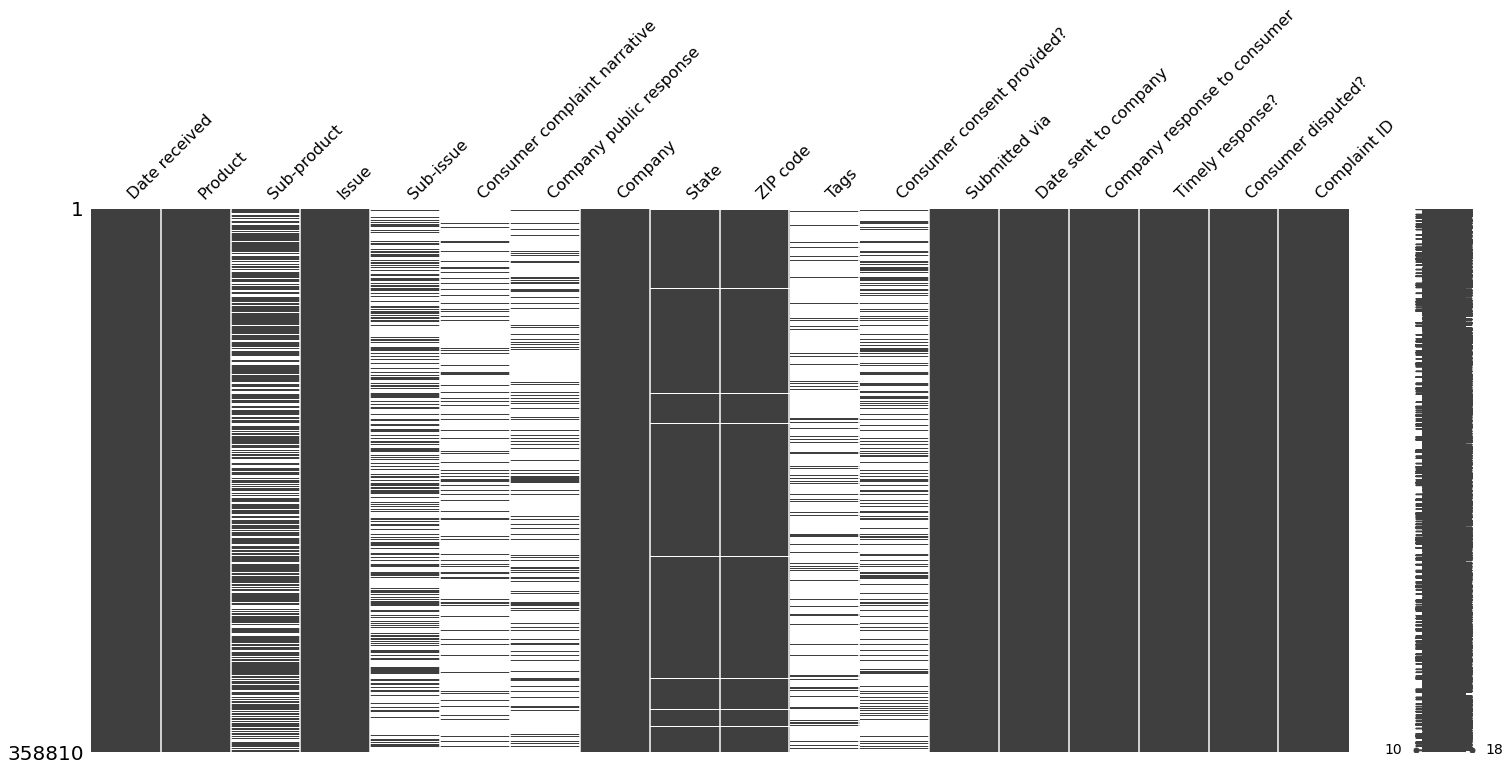

In [ ]:
msno.matrix(train_df)

In [ ]:
train_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
#To retain the original data, lets copy it into another dataframe
new_train_df=train_df.copy()
binning_train_df=train_df.copy()

**Complaint ID** is not significant predictor. <br>
**Zipcode** column can be dropped as its similar to State column already.<br>
**Tags** column missing more than 85% of data and it is not significant predictor<br>
**Consumer Complaint Narrative** column can also be dropped as its free text and missing more than 80% of values

We will drop above mentioned columns

In [ ]:
#working_train_df.drop(['Tags','Complaint ID','ZIP code','Consumer complaint narrative'],axis=1,inplace=True)
new_train_df.drop(['Complaint ID','ZIP code','Consumer complaint narrative'],axis=1,inplace=True)
binning_train_df.drop(['Complaint ID','ZIP code','Consumer complaint narrative'],axis=1,inplace=True)

**Univariate Analysis**<br>

**Product** Column

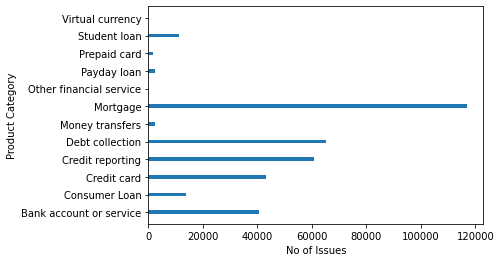

,Product,Issue,Percentage
0,Bank account or service,40667,11.33%
1,Consumer Loan,13964,3.89%
2,Credit card,43114,12.02%
3,Credit reporting,60672,16.91%
4,Debt collection,65033,18.12%
5,Money transfers,2502,0.70%
6,Mortgage,117066,32.63%
7,Other financial service,385,0.11%
8,Payday loan,2425,0.68%
9,Prepaid card,1671,0.47%


In [ ]:
cat=new_train_df['Product'].unique()
df=new_train_df.groupby('Product').count()['Issue']
# to get evenly spaced values within that range
x=np.arange(len(cat))
plt.barh(x,df,0.2)
plt.yticks(x,df.index)
plt.xlabel('No of Issues')
plt.ylabel('Product Category')
plt.show()

df=df.reset_index()
df['Percentage']=df['Issue'].map(lambda x: "{:,.2%}".format((x/358810)))
df

From the above plot, Virtual currency,Prepaid card, Payday loan, Other financial service, money Transfers,Student loan, Consumer loan having less issues compared to rest of the issues. lets group these issues into one category

**Grouping less occurances of category**

In [ ]:
binning_train_df['Product']=new_train_df['Product'].replace(['Virtual currency','Prepaid card', 'Payday loan', 'Other financial service', 'Money transfers','Student loan', 'Consumer Loan'],'others')

In [ ]:
df=binning_train_df.groupby('Product').count()['Issue']
df=df.reset_index()
df['Percentage']=df['Issue'].map(lambda x: "{:,.2%}".format((x/358810)))
df

,Product,Issue,Percentage
0,Bank account or service,40667,11.33%
1,Credit card,43114,12.02%
2,Credit reporting,60672,16.91%
3,Debt collection,65033,18.12%
4,Mortgage,117066,32.63%
5,others,32258,8.99%


**Sub-product** Column

In [ ]:
len(new_train_df['Sub-product'].unique())

48

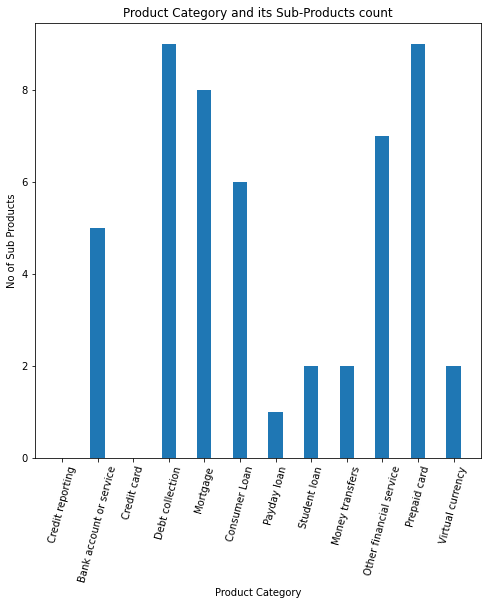

In [ ]:
l=[]
for p in new_train_df['Product'].unique():
  values=list(new_train_df[new_train_df['Product']==p]['Sub-product'].unique())
  mylist = [str(x) for x in values]
  if 'nan' in mylist:
    count=0
  else:
    count=len(values)
  l.append({'Product Category':p,"Sub-Product Count":count})
sub_df=pd.DataFrame(l)

x=np.arange(len(sub_df['Product Category'].unique()))
plt.figure(figsize=(8,8))
plt.bar(x,sub_df['Sub-Product Count'],width=0.4)
plt.xlabel('Product Category')
plt.ylabel('No of Sub Products')
plt.xticks(x,sub_df['Product Category'].unique(),rotation=75)
plt.title('Product Category and its Sub-Products count')
plt.show()

Missing values in **Sub-product** column is MNAR(Missing Not at Random). Because values are missed completely only for Product Categories [Credit Reporting and Credit Card Category].

In [ ]:
#binning_train_df.drop('Sub-product',axis=1,inplace=True)

**Sub Issue** Column

In [ ]:
len(new_train_df['Sub-issue'].unique())

68

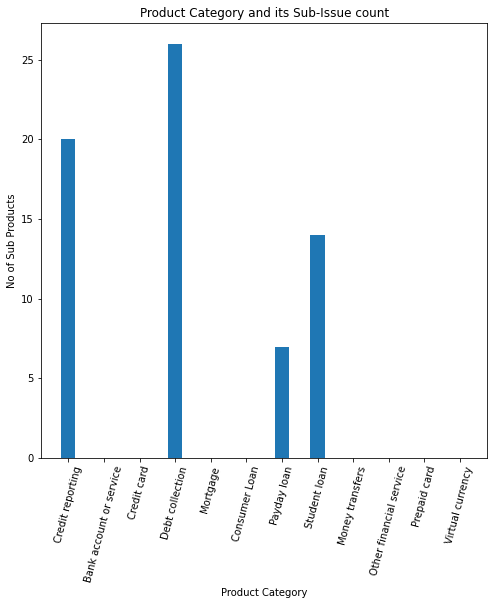

In [ ]:
l=[]
for p in new_train_df['Product'].unique():
  values=list(new_train_df[new_train_df['Product']==p]['Sub-issue'].unique())
  mylist = [str(x) for x in values]
  if 'nan' in mylist:
    count=0
  else:
    count=len(values)
  l.append({'Product Category':p,"Sub-issue Count":count})
sub_issue=pd.DataFrame(l)

x=np.arange(len(sub_df['Product Category'].unique()))
plt.figure(figsize=(8,8))
plt.bar(x,sub_issue['Sub-issue Count'],width=0.4)
plt.xlabel('Product Category')
plt.ylabel('No of Sub Products')
plt.xticks(x,sub_issue['Product Category'].unique(),rotation=75)
plt.title('Product Category and its Sub-Issue count')
plt.show()

**Sub-issue** column is completely empty for 6 product categories. It seems to be of MNAR phenomenon.<br>

**Issue** Column

In [ ]:
issue_df=new_train_df['Issue'].value_counts().reset_index()
issue_df['percentage']=issue_df['Issue'].map(lambda x: (x/new_train_df.shape[0])*100)
issue_df[issue_df['percentage']>1]


,index,Issue,percentage
0,"Loan modification,collection,foreclosure",60185,16.773501
1,Incorrect information on credit report,43825,12.213985
2,"Loan servicing, payments, escrow account",38456,10.717650
3,Cont'd attempts collect debt not owed,27266,7.599008
4,"Account opening, closing, or management",17557,4.893119
5,Disclosure verification of debt,12283,3.423260
6,Communication tactics,11457,3.193055
7,Deposits and withdrawals,11028,3.073493
8,"Application, originator, mortgage broker",8441,2.352499
9,Billing disputes,7244,2.018896


Based on above frequency distribution, less than 1% issues can be grouped. These issues can be grouped according to their frequencies. <br>

Lets group issues less than 1% as one category and issue >1% as another category

In [ ]:
binning_train_df['Issue']=binning_train_df['Issue'].replace([issue_df[issue_df['percentage']>=1]['index']],'issues >1 percent occurance')
binning_train_df['Issue']=binning_train_df['Issue'].replace([issue_df[issue_df['percentage']<1]['index']],'issues <1 percent occurance')

**Company Column**

In [ ]:
len(new_train_df['Company'].unique())

3064

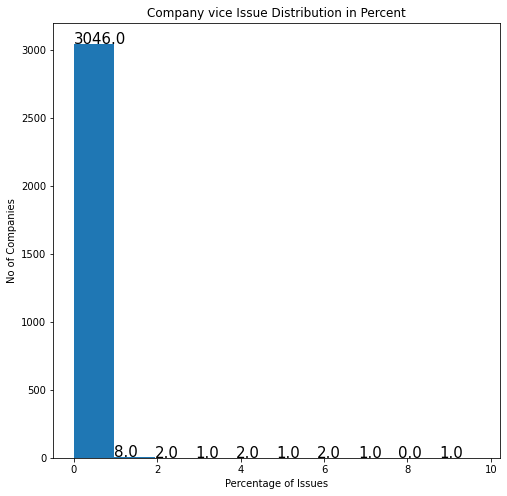

In [ ]:
company_df=new_train_df['Company'].value_counts().reset_index()
# Print range of issues (in percentage) occured in each company

company_df['Percentage']=company_df['Company'].map(lambda x: (x/358810)*100)

plt.figure(figsize=(8, 8))
freq,bins,patches=plt.hist(x=company_df['Percentage'])
for bar in patches:
  plt.annotate(bar.get_height(),xy=((bar.get_x(),bar.get_height())),size=15)

plt.xlabel("Percentage of Issues")
plt.ylabel("No of Companies")
plt.title("Company vice Issue Distribution in Percent")
plt.show()

From the above figure, its evident that out of 3064 companies,the occurance of issues are less than 1% in 3046 companies .

We will bin the Company based on the occurance of Issues as 0 to 1 and 1 to 10

In [ ]:
binning_train_df['Company']=binning_train_df['Company'].replace([company_df[company_df['Percentage']>=1]['index']],'Company >1% issues')
binning_train_df['Company']=binning_train_df['Company'].replace([company_df[company_df['Percentage']<1]['index']],'Company <1% issues')

**State Column**

Unique States 63


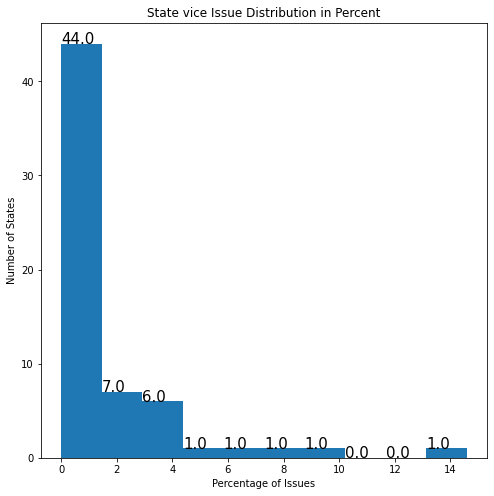

In [ ]:
print("Unique States",len(new_train_df['State'].unique()))
state_df=new_train_df['State'].value_counts().reset_index()
# Print range of issues (in percentage) occured in each company

state_df['Percentage']=state_df['State'].map(lambda x: (x/358810)*100)

plt.figure(figsize=(8, 8))
freq,bins,patches=plt.hist(x=state_df['Percentage'])
for bar in patches:
  plt.annotate(bar.get_height(),xy=((bar.get_x(),bar.get_height())),size=15)

plt.xlabel("Percentage of Issues")
plt.ylabel("Number of States")
plt.title("State vice Issue Distribution in Percent")
plt.show()

In [ ]:
binning_train_df['State']=binning_train_df['State'].replace([state_df[state_df['Percentage']>=1]['index']],'State >1 percent issues')
binning_train_df['State']=binning_train_df['State'].replace([state_df[state_df['Percentage']<1]['index']],'State <1 percent issues')

In [ ]:
binning_train_df

,Date received,Product,Issue,Company public response,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2015-10-14,Credit reporting,issues >1 percent occurance,NaN,GA,State >1 percent issues,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No
1,2015-04-26,Bank account or service,issues >1 percent occurance,NaN,GA,State >1 percent issues,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes
2,2013-12-20,Credit card,issues >1 percent occurance,NaN,SC,State >1 percent issues,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No
3,2016-03-03,Debt collection,issues >1 percent occurance,Company has responded to the consumer and the ...,OH,State >1 percent issues,NaN,Referral,2016-03-04,Closed with explanation,Yes,No
4,2015-01-30,Debt collection,issues >1 percent occurance,NaN,CA,State >1 percent issues,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,issues >1 percent occurance,NaN,OR,State >1 percent issues,NaN,Web,2014-04-13,Closed with non-monetary relief,Yes,No
358806,2013-03-14,Mortgage,issues >1 percent occurance,NaN,OH,State >1 percent issues,NaN,Referral,2013-03-18,Closed with non-monetary relief,Yes,No
358807,2013-02-01,Credit card,issues <1 percent occurance,NaN,TX,State >1 percent issues,NaN,Web,2013-02-01,Closed,Yes,Yes
358808,2015-06-25,Debt collection,issues >1 percent occurance,NaN,FL,State >1 percent issues,NaN,Phone,2015-06-29,Closed with non-monetary relief,Yes,No


**Company Public Response** column

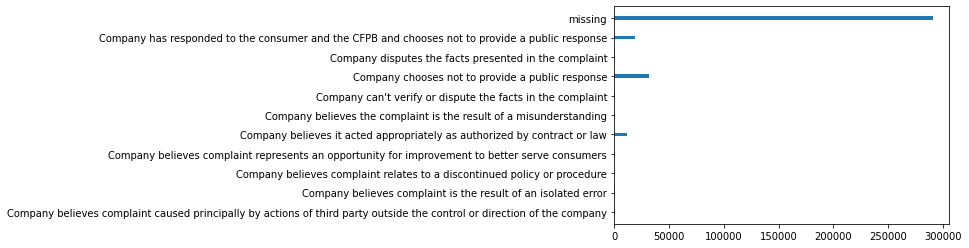

In [ ]:
new_train_df['Company public response']=new_train_df['Company public response'].fillna('missing')
binning_train_df['Company public response']=binning_train_df['Company public response'].fillna('missing')

cpr=new_train_df.groupby(['Company public response'],as_index=False).count()[['Company public response','Issue']]

y=np.arange(len(cpr['Company public response'].unique()))
plt.barh(y,cpr['Issue'],0.2)
plt.yticks(y,labels=cpr['Company public response'].unique())
plt.show()

In [ ]:
cpr=binning_train_df['Company public response'].value_counts().reset_index()
cpr['Percentage']=cpr['Company public response'].map(lambda x: (x/358810)*100)
binning_train_df['Company public response']=binning_train_df['Company public response'].replace([cpr[cpr['Percentage']<1]['index']],'Others')
binning_train_df['Company public response'].value_counts()

missing                                                                                            290879
Company chooses not to provide a public response                                                    31526
Company has responded to the consumer and the CFPB and chooses not to provide a public response     19268
Company believes it acted appropriately as authorized by contract or law                            12055
Others                                                                                               5082
Name: Company public response, dtype: int64

**Consumer consent provided?** column

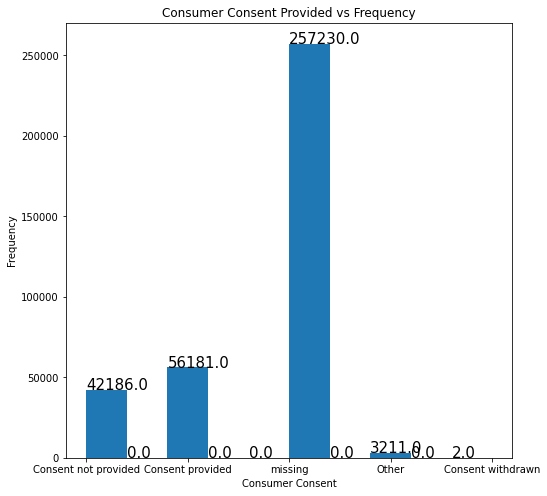

In [ ]:
new_train_df['Consumer consent provided?']=new_train_df['Consumer consent provided?'].fillna('missing')
binning_train_df['Consumer consent provided?']=binning_train_df['Consumer consent provided?'].fillna('missing')

plt.figure(figsize=(8, 8))
freq,bins,patches=plt.hist(x=new_train_df['Consumer consent provided?'])
for bar in patches:
  plt.annotate(bar.get_height(),xy=((bar.get_x(),bar.get_height())),size=15)

plt.xlabel("Consumer Consent")
plt.ylabel("Frequency")
plt.title("Consumer Consent Provided vs Frequency")
plt.show()

In [ ]:
ccp=binning_train_df['Consumer consent provided?'].value_counts().reset_index()
ccp['Percentage']=ccp['Consumer consent provided?'].map(lambda x: (x/358810)*100)
binning_train_df['Consumer consent provided?']=binning_train_df['Consumer consent provided?'].replace([ccp[ccp['Percentage']<1]['index']],'Others')
binning_train_df['Company public response'].value_counts()

missing                                                                                            290879
Company chooses not to provide a public response                                                    31526
Company has responded to the consumer and the CFPB and chooses not to provide a public response     19268
Company believes it acted appropriately as authorized by contract or law                            12055
Others                                                                                               5082
Name: Company public response, dtype: int64

**Submitted via** column

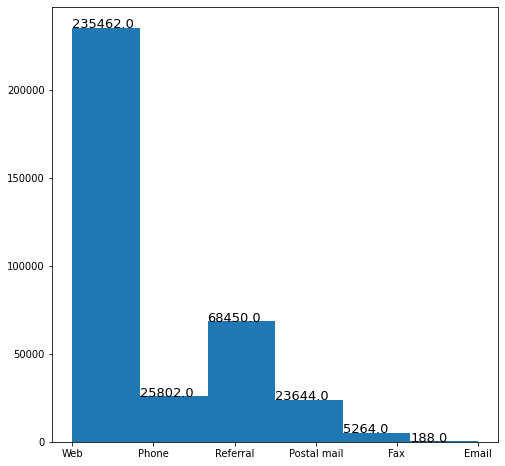

In [ ]:
plt.figure(figsize=(8,8))
freq,bins,patches=plt.hist(new_train_df['Submitted via'],bins=6)
for bar in patches:
  plt.annotate(bar.get_height(),xy=(bar.get_x(),bar.get_height()),size=13)
plt.show()

65% of issues are received through Website. 

In [ ]:
channel_df=new_train_df['Submitted via'].value_counts().reset_index()
channel_df['percentage']=channel_df['Submitted via'].map(lambda x: (x/358810)*100)
binning_train_df['Submitted via']=binning_train_df['Submitted via'].replace([channel_df[channel_df['percentage']<14]['index']],'Others')
binning_train_df['Submitted via']

0              Web
1              Web
2           Others
3         Referral
4              Web
            ...   
358805         Web
358806    Referral
358807         Web
358808      Others
358809    Referral
Name: Submitted via, Length: 358810, dtype: object

**Company response to Consumer** column

In [ ]:
crc=new_train_df.groupby(['Company response to consumer'],as_index=False)['Issue'].count()
crc['percentage']=crc['Issue'].map(lambda x: (x/new_train_df.shape[0])*100)
crc

,Company response to consumer,Issue,percentage
0,Closed,8568,2.387893
1,Closed with explanation,265700,74.050333
2,Closed with monetary relief,24715,6.888047
3,Closed with non-monetary relief,46085,12.843845
4,Closed with relief,3138,0.874558
5,Closed without relief,10604,2.955325


In [ ]:
binning_train_df['Company response to consumer']=binning_train_df['Company response to consumer'].replace([crc[crc['percentage']<5]['Company response to consumer']],'Others')
binning_train_df['Company response to consumer'].value_counts()

Closed with explanation            265700
Closed with non-monetary relief     46085
Closed with monetary relief         24715
Others                              22310
Name: Company response to consumer, dtype: int64

**Timely response?** column

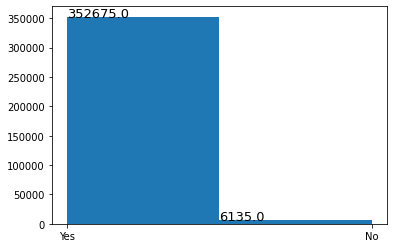

In [ ]:
freq,bins,patches=plt.hist(new_train_df['Timely response?'],bins=2)
for bar in patches:
  plt.annotate(bar.get_height(),xy=(bar.get_x(),bar.get_height()),size=13)
plt.show()

Company has responded timely manner for almost 98% of issues

**Bivariate Analysis**

1.**Company public response vs Consumer disputed?**

Text(0.5, 0, 'No of Issues')

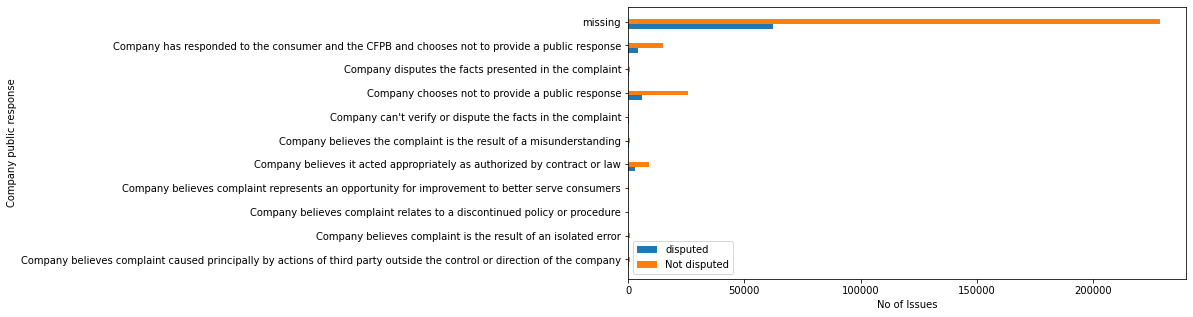

In [ ]:
'''
To see the dispute vs non disputes for the below response
1. get the records that are disputed for the company response
2. get the records that are non disputed for the company response
3. plt the bar graph for each category
'''

a_df=new_train_df.groupby(['Company public response','Consumer disputed?'],as_index=False).count()[['Company public response','Consumer disputed?','Issue']]
disputed=a_df[a_df['Consumer disputed?']=='Yes']
not_disputed=a_df[a_df['Consumer disputed?']=='No']


x=np.arange(len(a_df['Company public response'].unique()))
plt.figure(figsize=(10,5))
plt.barh(x,disputed['Issue'],0.2,label='disputed')
plt.barh(x+0.2,not_disputed['Issue'],0.2,label='Not disputed')

plt.yticks(x+0.2,labels=disputed['Company public response'])
plt.legend()
plt.ylabel('Company public response')
plt.xlabel('No of Issues')

In all categories of Consumer Public response, we have disputed records. From above figure proportion of dispute and non dispute seems to remain same irrespective of any value

 **Consumer Consent Provided vs Consumer disputed?**

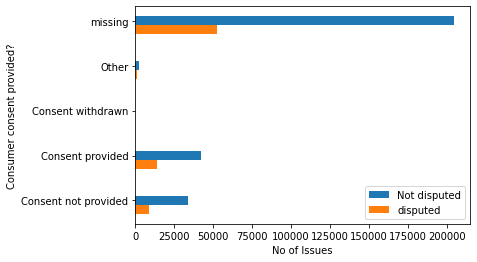

In [ ]:
cc=new_train_df.groupby(['Consumer disputed?','Consumer consent provided?'],as_index=False).count()[['Consumer consent provided?','Consumer disputed?','Issue']]
disputed_cc=cc[cc['Consumer disputed?']=='Yes']
nondisputed_cc=cc[cc['Consumer disputed?']=='No']


line=pd.DataFrame({'Consumer consent provided?':'Consent withdrawn','Consumer disputed?':'Yes', 'Issue':0},index=[7])  # adding a row
disputed_cc=pd.concat([disputed_cc.loc[:6],line,disputed_cc.loc[7:]]).reset_index(drop=True)


plt.barh(x,nondisputed_cc['Issue'],0.2,label='Not disputed')
plt.barh(x-0.2,disputed_cc['Issue'],0.2,label='disputed')
plt.yticks(x,labels=cc['Consumer consent provided?'].unique())
plt.xlabel('No of Issues')
plt.ylabel('Consumer consent provided?')
plt.legend()
plt.show()

disputed and not disputed proportion is same irrespective of values in Consumer Consent Provided column.

**Timely response?**

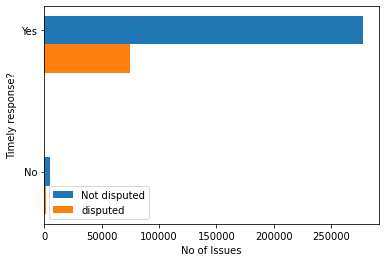

In [ ]:
tr=new_train_df.groupby(['Consumer disputed?','Timely response?'],as_index=False).count()[['Timely response?','Consumer disputed?','Issue']]
disputed_tr=tr[tr['Consumer disputed?']=='Yes']
nondisputed_tr=tr[tr['Consumer disputed?']=='No']

x=np.arange(len(disputed_tr['Timely response?'].unique()))

plt.barh(x,nondisputed_tr['Issue'],0.2,label='Not disputed')
plt.barh(x-0.2,disputed_tr['Issue'],0.2,label='disputed')
plt.yticks(x,labels=tr['Timely response?'].unique())
plt.xlabel('No of Issues')
plt.ylabel('Timely response?')
plt.legend()
plt.show()

Timely response doesnt change Consumer dispute status

**Sub-product vs Consumer disputed?**

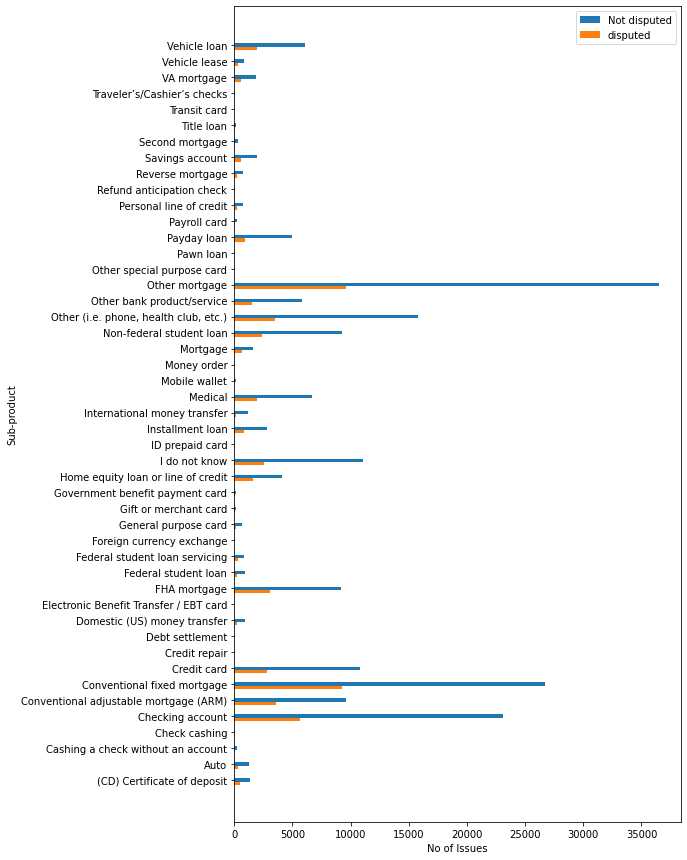

In [ ]:
sp=new_train_df.groupby(['Consumer disputed?','Sub-product'],as_index=False).count()[['Sub-product','Consumer disputed?','Issue']]
disputed_sp=sp[sp['Consumer disputed?']=='Yes']
nondisputed_sp=sp[sp['Consumer disputed?']=='No']

line=pd.DataFrame({'Sub-product':'Electronic Benefit Transfer / EBT card','Consumer disputed?':'Yes', 'Issue':0},index=[58])  # adding a row
disputed_sp=pd.concat([disputed_sp.loc[:57],line,disputed_sp.loc[58:]]).reset_index(drop=True)

x=np.arange(len(disputed_sp['Sub-product'].unique()))

plt.figure(figsize=(8,15))
plt.barh(x,nondisputed_sp['Issue'],0.2,label='Not disputed')
plt.barh(x-0.2,disputed_sp['Issue'],0.2,label='disputed')
plt.yticks(x,labels=sp['Sub-product'].unique())
plt.xlabel('No of Issues')
plt.ylabel('Sub-product')
plt.legend()
plt.show()

Sub-product and sub-issue are dependent on Product and Issue column. So those missing values falls under MNAR (Missing Not at Random) because, its not available only for few product categories. Also from above plot, disputes happened equally in all kind of subproducts. 

So lets drop these 2 columns

In [ ]:
#new_train_df.drop(['Sub-product','Sub-issue'],axis=1,inplace=True)

In [ ]:
new_train_df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company                         0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

**Imputation**

In [ ]:
StateImpute(new_train_df)

In [ ]:
new_train_df['Company public response'].fillna('UNKNOWN',inplace=True)
new_train_df['Consumer consent provided?'].fillna('UNKNOWN',inplace=True)

In [ ]:
new_train_df['Tags'].fillna('UNKNOWN',inplace=True)

In [ ]:
for p in new_train_df.Product.unique():
  val='UNKNOWN '+p
  m1=(new_train_df['Product']==p)
  m2=(new_train_df['Product']==p)
  new_train_df.loc[m1,'Sub-product']=new_train_df.loc[m1,'Sub-product'].fillna(val)
  new_train_df.loc[m1,'Sub-issue']=new_train_df.loc[m2,'Sub-issue'].fillna(val)

In [ ]:
new_train_df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company                         0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

**Feature Engineering**

In [ ]:
Month_Year_WeekDay(new_train_df)

In [ ]:
new_train_df = encode(new_train_df,'Day_of_Week',7)
new_train_df.drop(['Day_of_Week'],axis=1,inplace=True)

In [ ]:
te_train_df=new_train_df.copy()

**Handling Categorical Values**

**Method:1 Label encoding**

In [ ]:
new_train_df['Product'] =new_train_df['Product'].astype('category').cat.codes
new_train_df['Sub-product'] =new_train_df['Sub-product'].astype('category').cat.codes
new_train_df['Issue'] =new_train_df['Issue'].astype('category').cat.codes
new_train_df['Sub-issue'] =new_train_df['Sub-product'].astype('category').cat.codes
new_train_df['Tags'] =new_train_df['Sub-product'].astype('category').cat.codes
new_train_df['Company'] =new_train_df['Company'].astype('category').cat.codes 
new_train_df['Company public response'] =new_train_df['Company public response'].astype('category').cat.codes
new_train_df['Consumer consent provided?'] =new_train_df['Consumer consent provided?'].astype('category').cat.codes
new_train_df['State'] =new_train_df['State'].astype('category').cat.codes
new_train_df['Submitted via'] =new_train_df['Submitted via'].astype('category').cat.codes
new_train_df['Company response to consumer'] =new_train_df['Company response to consumer'].astype('category').cat.codes
new_train_df['Timely response?'] =new_train_df['Timely response?'].astype('category').cat.codes

In [ ]:
mapTargetVariable(new_train_df,'Consumer disputed?')

In [ ]:
new_train_df.dtypes

Product                            int8
Sub-product                        int8
Issue                              int8
Sub-issue                          int8
Company public response            int8
Company                           int16
State                              int8
Tags                               int8
Consumer consent provided?         int8
Submitted via                      int8
Company response to consumer       int8
Timely response?                   int8
Consumer disputed?                int64
Day_of_Week sin                 float64
Day_of_Week cos                 float64
dtype: object

In [ ]:
new_train_df.head(5)

,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day_of_Week sin,Day_of_Week cos
0,3,45,52,45,10,998,15,45,0,5,1,1,0,0.433884,-0.900969
1,0,30,39,30,10,2986,15,30,1,5,1,1,1,0.000000,1.000000
2,2,44,68,44,10,623,50,44,4,2,3,1,0,-0.974928,-0.222521
3,4,29,40,29,9,1031,43,29,4,4,1,1,0,-0.433884,-0.900969
4,4,24,40,24,10,1320,8,24,4,5,1,1,1,-0.974928,-0.222521


**Feature Selection: Through Correlation**

In [ ]:
df=new_train_df[new_train_df.columns[0:]].corr()['Consumer disputed?'][:].reset_index()
df.sort_values(by='Consumer disputed?')

,index,Consumer disputed?
10,Company response to consumer,-0.058281
1,Sub-product,-0.032738
3,Sub-issue,-0.032738
7,Tags,-0.032738
8,Consumer consent provided?,-0.024403
6,State,-0.007877
5,Company,0.000213
2,Issue,0.000467
13,Day_of_Week sin,0.000669
11,Timely response?,0.003859


From the above correlation, it seems company and Timely response, Issue has least relation with Consumer disputed? column. so lets drop

In [ ]:
new_train_df.drop(['Issue','Company','Timely response?'],axis=1,inplace=True)

In [ ]:
y=new_train_df['Consumer disputed?']
X=new_train_df.drop(['Consumer disputed?'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=splitdata(X,y)

In [ ]:
X_train=Scaling(X_train)

In [ ]:
l=[]
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier(random_state=45)))
models.append(('Linear SVC',LinearSVC(verbose=False, max_iter=10000, tol=1e-4, C=0.1)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_split=10,random_state=13)))
for name,model in models:
  st_time = time.time()
  kfold=KFold(n_splits=5)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold,error_score="raise")
  print(cross_val_sc)
  en_time = time.time()
  l.append({'Model':name,'Time Taken':en_time-st_time,'Accuracy':cross_val_sc.mean()})
df=pd.DataFrame(l,columns=['Model','Time Taken','Accuracy'])
df

[0.79066365 0.78735412 0.78606515 0.78613109 0.78832587]
[0.75458979 0.75255182 0.74957325 0.75084046 0.75230365]
[0.79066365 0.78735412 0.78606515 0.78613109 0.78832587]
[0.7761714  0.77380247 0.77167741 0.7724747  0.77332822]


,Model,Time Taken,Accuracy
0,Logistic Regression,2.544005,0.787708
1,Decision Tree,5.286153,0.751972
2,Linear SVC,57.793038,0.787708
3,Random Forest,139.958729,0.773491


Baseline is 78% Accuracy. In order to improve lets do **Target Encoding** for categorical variables instead of label encoding

**METHOD:2 Target Encoding with Additive Smoothing**

In [ ]:
#te_train_df.drop(['Issue','Timely response?','Company'],axis=1,inplace=True)

In [ ]:
mapTargetVariable(te_train_df,'Consumer disputed?')

In [ ]:
def TargetEncoding(df):
  df['Product']=calc_smooth_mean(df,by='Product',on='Consumer disputed?',m=5000)
  df['Sub-product']=calc_smooth_mean(df,by='Sub-product',on='Consumer disputed?',m=5000)
  df['Sub-issue']=calc_smooth_mean(df,by='Sub-issue',on='Consumer disputed?',m=5000)
  df['Issue']=calc_smooth_mean(df,by='Issue',on='Consumer disputed?',m=5000)
  df['Company public response']=calc_smooth_mean(df,by='Company public response',on='Consumer disputed?',m=5000)
  df['Company']=calc_smooth_mean(df,by='Company',on='Consumer disputed?',m=5000)
  df['State']=calc_smooth_mean(df,by='State',on='Consumer disputed?',m=5000)
  df['Consumer consent provided?']=calc_smooth_mean(df,by='Consumer consent provided?',on='Consumer disputed?',m=5000)
  df['Timely response?']=calc_smooth_mean(df,by='Timely response?',on='Consumer disputed?',m=5000)
  df['Submitted via']=calc_smooth_mean(df,by='Submitted via',on='Consumer disputed?',m=5000)
  df['Company response to consumer']=calc_smooth_mean(df,by='Company response to consumer',on='Consumer disputed?',m=5000)
  df['Tags']=calc_smooth_mean(df,by='Tags',on='Consumer disputed?',m=5000)

In [ ]:
TargetEncoding(te_train_df)

In [ ]:
te_train_df.dtypes

Product                         float64
Sub-product                     float64
Issue                           float64
Sub-issue                       float64
Company public response         float64
Company                         float64
State                           float64
Tags                            float64
Consumer consent provided?      float64
Submitted via                   float64
Company response to consumer    float64
Timely response?                float64
Consumer disputed?                int64
Day_of_Week sin                 float64
Day_of_Week cos                 float64
dtype: object

In [ ]:
y=te_train_df['Consumer disputed?']
X=te_train_df.drop('Consumer disputed?',axis=1)

In [ ]:
X_train,X_test,y_train,y_test=splitdata(X,y)

In [ ]:
X_train=Scaling(X_train)

In [ ]:
l=[]
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier(random_state=45)))
models.append(('Linear SVC',LinearSVC(verbose=False, max_iter=10000, tol=1e-4, C=0.1)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_split=10,random_state=13)))
for name,model in models:
  st_time = time.time()
  kfold=KFold(n_splits=5)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold,error_score="raise")
  print(cross_val_sc)
  en_time = time.time()
  l.append({'Model':name,'Time Taken':en_time-st_time,'Accuracy':cross_val_sc.mean()})
df=pd.DataFrame(l,columns=['Model','Time Taken','Accuracy'])
df

[0.79066365 0.78735412 0.78606515 0.78613109 0.78832587]
[0.6922139  0.69170876 0.69224874 0.6934627  0.69246982]
[0.79066365 0.78735412 0.78606515 0.78613109 0.78832587]
[0.78474133 0.78195436 0.77998607 0.78038287 0.78362278]


,Model,Time Taken,Accuracy
0,Logistic Regression,4.263444,0.787708
1,Decision Tree,7.712393,0.692421
2,Linear SVC,99.006443,0.787708
3,Random Forest,157.244058,0.782137


Even after Target Encoding, accuracy is not improved.

To improve, we will reduce the noise in data. i.e., binning the low occurances of category

**Method:3 Feature Cross with Target Encoding**

In [19]:
binning_train_df=train_df.copy()

In [20]:
dropcols(binning_train_df,['Complaint ID','ZIP code','Consumer complaint narrative','Company public response'])
impute(binning_train_df)
featurecross(binning_train_df)
dropcols(binning_train_df,['Product','Issue','Sub-product','Sub-issue','Company response to consumer','Timely response?'])
binning(binning_train_df,'Combined Issue')
binning(binning_train_df,'Combined Products')
Month_Year_WeekDay(binning_train_df)
encode(binning_train_df,'Day_of_Week',7)
dropcols(binning_train_df,['Day_of_Week'])
mapTargetVariable(binning_train_df,'Consumer disputed?')

In [21]:
smoothed_products=calc_smooth_mean(binning_train_df,by='Combined Products',on='Consumer disputed?',m=300)
smoothed_Issue=calc_smooth_mean(binning_train_df,by='Combined Issue',on='Consumer disputed?',m=300)
smoothed_Company=calc_smooth_mean(binning_train_df,by='Company',on='Consumer disputed?',m=300)
smoothed_State=calc_smooth_mean(binning_train_df,by='State',on='Consumer disputed?',m=300)
smoothed_Response=calc_smooth_mean(binning_train_df,by='Company_Response',on='Consumer disputed?',m=300)
smoothed_Consent=calc_smooth_mean(binning_train_df,by='Consumer consent provided?',on='Consumer disputed?',m=300)
smoothed_submitted=calc_smooth_mean(binning_train_df,by='Submitted via',on='Consumer disputed?',m=300)
smoothed_tags=calc_smooth_mean(binning_train_df,by='Tags',on='Consumer disputed?',m=300)

In [22]:
Target_Encoding_after_FeatureCross(binning_train_df)

In [23]:
test_copy_df=test_df.copy()
dropcols(test_copy_df,['Complaint ID','ZIP code','Consumer complaint narrative','Company public response'])
impute(test_copy_df)
featurecross(test_copy_df)
dropcols(test_copy_df,['Product','Issue','Sub-product','Sub-issue','Company response to consumer','Timely response?'])
binning(test_copy_df,'Combined Issue')
binning(test_copy_df,'Combined Products')
Month_Year_WeekDay(test_copy_df)
encode(test_copy_df,'Day_of_Week',7)
dropcols(test_copy_df,['Day_of_Week'])
Target_Encoding_after_FeatureCross(test_copy_df)

**Removing the Outliers**

In [24]:
Outliers=binning_train_df[binning_train_df['Company']>0.36]
binning_train_df.drop(Outliers.index,axis=0,inplace=True)

**Splitting train and test**

In [25]:
y=binning_train_df['Consumer disputed?']
X=binning_train_df.drop('Consumer disputed?',axis=1)

In [26]:
from collections import Counter
from numpy import where
counter = Counter(y)
print(counter)

Counter({0: 282616, 1: 76083})


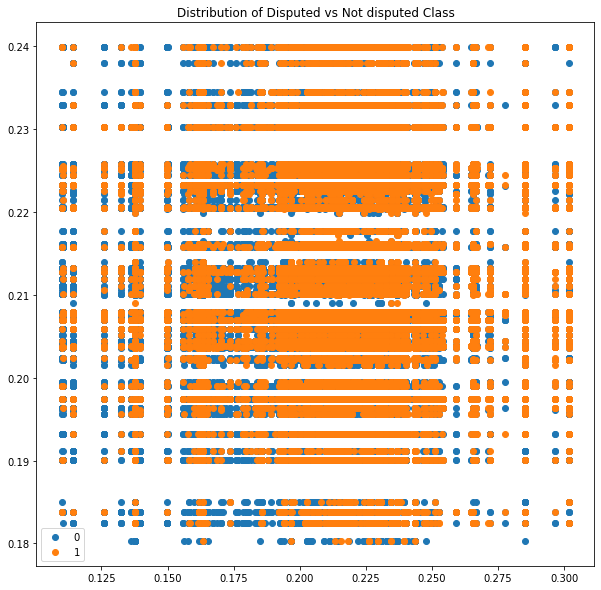

In [ ]:
# scatter plot of examples by class label
plt.figure(figsize=(10,10))
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.title("Distribution of Disputed vs Not disputed Class")
plt.show()

In [27]:
X_train,X_test,y_train,y_test=splitdata(X,y)

In [28]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_copy_df=scaler.transform(test_copy_df)

**METHOD:1 Baseline for RECALL SCORE** (goal is to improve prediction of disputed records)

In [29]:
l=[]
models=[]
models.append(('Decision Tree',DecisionTreeClassifier(random_state=100)))
#models.append(('Random Forest',RandomForestClassifier(random_state=100)))
for name,model in models:
  st_time = time.time()
  kfold=KFold(n_splits=5)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='recall',cv=kfold,error_score="raise")
  print(cross_val_sc)
  en_time = time.time()
  l.append({'Model':name,'Time Taken':en_time-st_time,'Recall-Score':cross_val_sc.mean()})
df=pd.DataFrame(l,columns=['Model','Time Taken','Recall-Score'])
df

[0.24612694 0.23538652 0.24259543 0.25063333 0.23943314]


,Model,Time Taken,Recall-Score
0,Decision Tree,6.896429,0.242835


As its imbalanced dataset, we have chosen "Recall Score" instead of relying on Accuracy.

Recall -Score is worst in Logistic Regression and Naive Bayes algorithm. 
Decision Tree and Random Forest are considerable. 

The base recall score is 0.24, lets improve further

In [31]:
def train_test_model(model, X_train, X_test, y_train, y_test):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

Start training...done!
Start testing...done!
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     56523
           1       0.27      0.24      0.25     15217

    accuracy                           0.70     71740
   macro avg       0.53      0.53      0.53     71740
weighted avg       0.69      0.70      0.69     71740



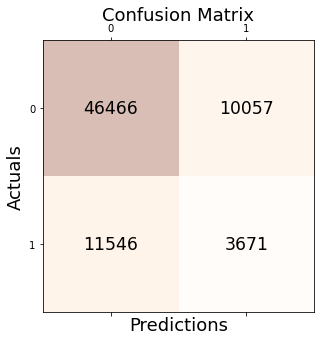

In [34]:
predictions, accuracy, metrics_report, nb_prf = train_test_model(DecisionTreeClassifier(random_state=100),X_train,X_test,y_train,y_test)
print(metrics_report)
conf_matrix=confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

False Negative (Wrongly Predicted as **Not disputed**) count is too high.Thats y recall rate was 0.24. Lets try to improve by Hyper parameter tuning

**METHOD:2 Hyper parameter Tuning (Balancing Weights)**


In [44]:
dt=DecisionTreeClassifier(random_state=100,class_weight='balanced')
params={
    'criterion':['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]
}
grid_no_up = GridSearchCV(dt, param_grid = params, cv = 5, scoring='recall').fit(X_train, y_train)
grid_no_up.best_score_

0.7401998117306989

In [ ]:
grid_no_up.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

              precision    recall  f1-score   support

           0       0.86      0.44      0.58     56523
           1       0.26      0.74      0.39     15217

    accuracy                           0.50     71740
   macro avg       0.56      0.59      0.48     71740
weighted avg       0.73      0.50      0.54     71740



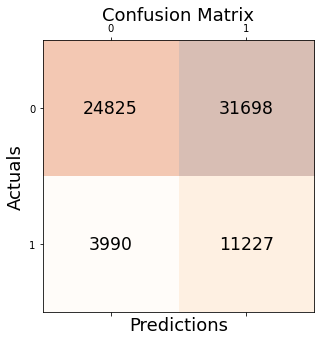

In [46]:
predictions = grid_no_up.predict(X_test)
print(classification_report(y_test,predictions))
conf_matrix=confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

After passing Class-weight:'balanced', Recall rate is improved from 0.24 to 0.74 but at the cost of misclassification of Not disputed samples as disputed.

**METHOD:3 Upsample using the imblearn pipeline**

In [93]:
imba_pipeline = make_pipeline(SMOTE(random_state=42),DecisionTreeClassifier(random_state=100))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=KFold(n_splits=5))

array([0.28085957, 0.27416288, 0.27568396, 0.2800523 , 0.27173107])

In [106]:
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=KFold(n_splits=5), scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [98]:
grid_imba.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 2}

In [99]:
grid_imba.best_score_

0.8411513435518494

In [107]:
y_test_predict = grid_imba.predict(X_test)
recall_score(y_test, y_test_predict)

0.84438456988894

In [114]:
test_df.shape

(119606, 17)

In [115]:
predictions=grid_imba.predict(test_copy_df)
df = pd.DataFrame(predictions, columns=["predictions"])
df['predictions']=df['predictions'].map({0:'No',1:'Yes'})
df.to_csv('predictions.csv', index=False)

              precision    recall  f1-score   support

           0       0.86      0.26      0.40     56523
           1       0.24      0.84      0.37     15217

    accuracy                           0.39     71740
   macro avg       0.55      0.55      0.39     71740
weighted avg       0.73      0.39      0.40     71740



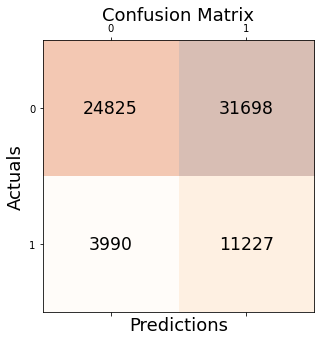

In [108]:
print(classification_report(y_test,y_test_predict))
conf_matrix=confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

As per the given problem Statement in Project pdf document, **considering to improve recall score as its critical to predict disputed records** to improve Company reputation.<br>
"Predicting whether a complaint resolution will be accepted or rejected by a consumer can
enable a business to proactively look at complaints which might be disputed and hence save
unnecessary escalation as well as their reputation. Systemic issues can be identified by noticing
which complaints have a higher potential to be disputed, and customer support agents can be
trained to pay more attention or enhance the quality of communication for certain types of
complaints."

**Conclusion:**

Method | Recall Score (Training data) | Recall Score (Test data)
--- | --- | ---
No upsampling (baseline) | 24% | 24%
Balancing Weights for 2 classes| 74% | 74%
Upsample as part of CV(pipeline) | 84% | 84%